In [1]:
# https://www.youtube.com/watch?v=exaWOE8jvy8&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4

# PyTorch Tensors

In [2]:
import torch
import numpy as np

In [3]:
x = torch.empty(1)
# like scaler value
x

tensor([-455.6006])

In [4]:
x = torch.empty(3)
# 1D vector with 3 elem
x

tensor([-4.5560e+02,  4.3510e-41,  4.8874e+03])

In [5]:
# tensor with random value
x = torch.rand(2,2)
x

tensor([[0.4699, 0.3440],
        [0.6296, 0.0185]])

## Tensors Data type

In [6]:
x = torch.ones(2,2)
# print datatype
x.dtype

torch.float32

In [7]:
x = torch.ones(2,2, dtype=torch.double)
# print datatype
x.dtype

torch.float64

## Tensors Size

In [8]:
x = torch.tensor([[2.5, 0.1], [2.5, 0.1]])
print(x)
print(x.size())

tensor([[2.5000, 0.1000],
        [2.5000, 0.1000]])
torch.Size([2, 2])


## Tensor Operations

In [9]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)

z = x + y
z

tensor([[0.7174, 0.8541],
        [1.2728, 1.3432]])

In [10]:
z = torch.add(x, y)
z

tensor([[0.7174, 0.8541],
        [1.2728, 1.3432]])

In [11]:
# inplace addition
# every function that has "_" will do inplace operation
y.add_(x)
y

tensor([[0.7174, 0.8541],
        [1.2728, 1.3432]])

In [12]:
# slicing
print(x)
print(x[:, 0])

tensor([[0.1271, 0.1349],
        [0.8621, 0.4979]])
tensor([0.1271, 0.8621])


In [13]:
print(x[1, :])

tensor([0.8621, 0.4979])


In [14]:
print(x[1,1])
# will give actual value
# only if one element in tensor
print(x[1, 1].item())

tensor(0.4979)
0.4979014992713928


### Reshape Tensor

In [15]:
x = torch.rand(4, 4)
print(x)
# 1D with 16 elem
print(x.view(16))

tensor([[0.7009, 0.4683, 0.0725, 0.7778],
        [0.0867, 0.2924, 0.4156, 0.5383],
        [0.1740, 0.3973, 0.1165, 0.4598],
        [0.0702, 0.2491, 0.7001, 0.7592]])
tensor([0.7009, 0.4683, 0.0725, 0.7778, 0.0867, 0.2924, 0.4156, 0.5383, 0.1740,
        0.3973, 0.1165, 0.4598, 0.0702, 0.2491, 0.7001, 0.7592])


In [16]:
x = torch.rand(4, 4)
print(x)
# 2D with not specifing num of rows with 01
# but giving num of elements in a row that is 8
print(x.view(-1, 8))

tensor([[0.3963, 0.9383, 0.7912, 0.4819],
        [0.4977, 0.6223, 0.0645, 0.5949],
        [0.8341, 0.4625, 0.9082, 0.6447],
        [0.4001, 0.6542, 0.0532, 0.8381]])
tensor([[0.3963, 0.9383, 0.7912, 0.4819, 0.4977, 0.6223, 0.0645, 0.5949],
        [0.8341, 0.4625, 0.9082, 0.6447, 0.4001, 0.6542, 0.0532, 0.8381]])


### Tensor to numpy arr

In [17]:
a = torch.ones(5)
print(a)

b = a.numpy()
print(type(b))

tensor([1., 1., 1., 1., 1.])
<class 'numpy.ndarray'>


In [18]:
# both numpy array and tensor will share same memory location if tensor is on CPU not on GPU

# broadcast so adds 1 to each element
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


### Send tensor to GPU

In [19]:
# check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")

    # will create tensor in GPU
    x = torch.ones(5, device=device)

    # create first and then move it to GPU
    y = torch.ones(5)
    y = y.to(device)

    # will be performed on GPU
    z = x + y

    # will give error
    # cause numpy can only handle CPU array
    # so has to send it to CPU first
    # z.numpy()

    # send z to cpu
    z = z.to("cpu")
    print(z.numpy())

[2. 2. 2. 2. 2.]


### Calculate Gradient of Tensor

In [20]:
# To tell pytorch that u have to calculate graident of tensor during optimization step

x = torch.ones(5, requires_grad = True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


# AutoGrad

In [21]:
import torch

In [22]:
x = torch.randn(3, requires_grad=True)

# each operation will creare a computation graph
# which will be used for calcuating grad
# since we set required_grad to true
y = x + 2
z = y * y * 2
z = z.mean()

# can only be called on required_grad set to true
# uses vector jacobain product to get the derivatives
# also called chain rule
# since z is scaler value backward func doest takes any argument
z.backward() # calc dz/dx
x.grad

tensor([2.7736, 3.5039, 2.8934])

In [23]:
x = torch.randn(3, requires_grad=True)

# each operation will creare a computation graph
# which will be used for calcuating grad
# since we set required_grad to true
y = x + 2
z = y * y * 2
# z = z.mean()

# can only be called on required_grad set to true
# uses vector jacobain product to get the derivatives
# also called chain rule
# now z isnt scaler value anymore so need to pass some argument to backward func
# v has to be same size as z
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)

z.backward(v) # calc dz/dx
x.grad

tensor([6.1251e-01, 1.2692e+01, 1.1880e-04])

## Prevent Gradient Tracking for some operations/tensor

In [24]:
# prevent tracking gradient
# like operation updating weights should be used when calculating grad

# multiple ways to do same thing
# x.requires_grad_(False)

# this will create a new tensor
# x.detach()

# wrap operation in following with
# with torch.no_grad():

x = torch.randn(3, requires_grad=True)
print(x)

with torch.no_grad():
    y = x + 2
    # no grad attribute
    print(y)

tensor([ 0.4895, -2.2612, -0.9088], requires_grad=True)
tensor([ 2.4895, -0.2612,  1.0912])


## Training Example

In [25]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(2):
    model_output = (weights*3).sum()

    model_output.backward()
    print(weights.grad)

    # empty gradient
    # very important
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# Backpropogation

In [26]:
import torch

In [27]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad = True)

# forward pass
y_hat = w * x
loss = (y_hat - y)**2
print(loss)

# backward pass
loss.backward()
print(w.grad)

# update weights
# next forward and backward pass

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# Gradient Descent

## Gradient Descent from scratch

In [28]:
import numpy as np

In [29]:
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
    return w * x

# loss
def loss(y, y_pred):
    return ((y_pred-y)**2).mean()

# gradient
# Loss = 1 / N * (w*x - y_pred)**2
# dJ/dw = 1/N * 2x * (wx - y_pred)

# gradient
def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred-y).mean()

print(f"Prediciton before training f(5) = {forward(5):.3f}")

# training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    # frwd pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # gradient
    dw = gradient(X, Y, y_pred)

    # update weights
    w -= learning_rate * dw

    if (epoch%1==0):
        print(f"epoch={epoch+1}, w={w:.3f}, loss={l:.8f}")

print(f"Prediciton after training f(5) = {forward(5):.3f}")

Prediciton before training f(5) = 0.000
epoch=1, w=1.200, loss=30.00000000
epoch=2, w=1.680, loss=4.79999924
epoch=3, w=1.872, loss=0.76800019
epoch=4, w=1.949, loss=0.12288000
epoch=5, w=1.980, loss=0.01966083
epoch=6, w=1.992, loss=0.00314574
epoch=7, w=1.997, loss=0.00050331
epoch=8, w=1.999, loss=0.00008053
epoch=9, w=1.999, loss=0.00001288
epoch=10, w=2.000, loss=0.00000206
Prediciton after training f(5) = 9.999


## Torch for Gradient Descent

In [30]:
import torch

In [31]:
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# since neends grad with respect to it
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss
def loss(y, y_pred):
    return ((y_pred-y)**2).mean()

# gradient
# Loss = 1 / N * (w*x - y_pred)**2
# dJ/dw = 1/N * 2x * (wx - y_pred)

print(f"Prediciton before training f(5) = {forward(5):.3f}")

# training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # frwd pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # gradient
    dw = l.backward() # dl/dw

    # update weights
    # should not be part of gradient computation
    with torch.no_grad():
        w -= learning_rate * w.grad

    # zero gradients
    w.grad.zero_()
    
    if (epoch%10==0):
        print(f"epoch={epoch+1}, w={w:.3f}, loss={l:.8f}")

print(f"Prediciton after training f(5) = {forward(5):.3f}")

Prediciton before training f(5) = 0.000
epoch=1, w=0.300, loss=30.00000000
epoch=11, w=1.665, loss=1.16278565
epoch=21, w=1.934, loss=0.04506890
epoch=31, w=1.987, loss=0.00174685
epoch=41, w=1.997, loss=0.00006770
epoch=51, w=1.999, loss=0.00000262
epoch=61, w=2.000, loss=0.00000010
epoch=71, w=2.000, loss=0.00000000
epoch=81, w=2.000, loss=0.00000000
epoch=91, w=2.000, loss=0.00000000
Prediciton after training f(5) = 10.000


# Use model, loss, optimizer

## Steps of designing model
- design model inputs, outputs and forward pass
- construct loss and optimizer
- training loop
  - forward pass
  - backward pass
  - update weights
  - zero grad

In [32]:
import torch
import torch.nn as nn

## Use loss and optimizer from pytorch

In [33]:
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# since neends grad with respect to it
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

print(f"Prediciton before training f(5) = {forward(5):.3f}")

# training
learning_rate = 0.01
n_iters = 100

# loss
loss = nn.MSELoss()

# optimizer
# takes list of param to optimize
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
    # frwd pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # gradient
    dw = l.backward() # dl/dw

    # update weights
    # can be done by optimizer
    # this will do optimization step
    optimizer.step()

    # zero gradients
    # use optimizer to zero grad
    optimizer.zero_grad()
    
    if (epoch%10==0):
        print(f"epoch={epoch+1}, w={w:.3f}, loss={l:.8f}")

print(f"Prediciton after training f(5) = {forward(5):.3f}")

Prediciton before training f(5) = 0.000
epoch=1, w=0.300, loss=30.00000000
epoch=11, w=1.665, loss=1.16278565
epoch=21, w=1.934, loss=0.04506890
epoch=31, w=1.987, loss=0.00174685
epoch=41, w=1.997, loss=0.00006770
epoch=51, w=1.999, loss=0.00000262
epoch=61, w=2.000, loss=0.00000010
epoch=71, w=2.000, loss=0.00000000
epoch=81, w=2.000, loss=0.00000000
epoch=91, w=2.000, loss=0.00000000
Prediciton after training f(5) = 10.000


## Use model from pytorch instead of forward func

In [34]:
# X must be 2D array, where each row is diff input
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape

# since neends grad with respect to it
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)

print(f"Prediciton before training f(5) = {model(X_test).item():.3f}")

# training
learning_rate = 0.01
n_iters = 1000

# loss
loss = nn.MSELoss()

# optimizer
# takes list of param to optimize
# model.parameters() gives list of optimizable param of model
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    # frwd pass
    y_pred = model(X)

    # loss
    l = loss(Y, y_pred)

    # gradient
    dw = l.backward() # dl/dw

    # update weights
    # can be done by optimizer
    # this will do optimization step
    optimizer.step()

    # zero gradients
    # use optimizer to zero grad
    optimizer.zero_grad()
    
    if (epoch%100==0):
        [w, b] = model.parameters()
        print(f"epoch={epoch+1}, w={w[0][0].item():.3f}, loss={l:.8f}")

print(f"Prediciton after training f(5) = {model(X_test).item():.3f}")

Prediciton before training f(5) = -0.654
epoch=1, w=-0.004, loss=30.55484009
epoch=101, w=1.626, loss=0.20262466
epoch=201, w=1.723, loss=0.11123858
epoch=301, w=1.795, loss=0.06106859
epoch=401, w=1.848, loss=0.03352591
epoch=501, w=1.887, loss=0.01840536
epoch=601, w=1.917, loss=0.01010430
epoch=701, w=1.938, loss=0.00554714
epoch=801, w=1.954, loss=0.00304533
epoch=901, w=1.966, loss=0.00167183
Prediciton after training f(5) = 9.948


## Create custom model

In [35]:
# X must be 2D array, where each row is diff input
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape

# since neends grad with respect to it
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

input_size = n_features
output_size = n_features

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()

        # define layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)

print(f"Prediciton before training f(5) = {model(X_test).item():.3f}")

# training
learning_rate = 0.01
n_iters = 1000

# loss
loss = nn.MSELoss()

# optimizer
# takes list of param to optimize
# model.parameters() gives list of optimizable param of model
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    # frwd pass
    y_pred = model(X)

    # loss
    l = loss(Y, y_pred)

    # gradient
    dw = l.backward() # dl/dw

    # update weights
    # can be done by optimizer
    # this will do optimization step
    optimizer.step()

    # zero gradients
    # use optimizer to zero grad
    optimizer.zero_grad()
    
    if (epoch%100==0):
        [w, b] = model.parameters()
        print(f"epoch={epoch+1}, w={w[0][0].item():.3f}, loss={l:.8f}")

print(f"Prediciton after training f(5) = {model(X_test).item():.3f}")

Prediciton before training f(5) = 5.249
epoch=1, w=1.040, loss=5.59759617
epoch=101, w=1.761, loss=0.08328646
epoch=201, w=1.823, loss=0.04572337
epoch=301, w=1.869, loss=0.02510153
epoch=401, w=1.903, loss=0.01378044
epoch=501, w=1.928, loss=0.00756528
epoch=601, w=1.947, loss=0.00415324
epoch=701, w=1.960, loss=0.00228008
epoch=801, w=1.971, loss=0.00125174
epoch=901, w=1.978, loss=0.00068719
Prediciton after training f(5) = 9.967


# Linear Regression

In [36]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

epoch: 10, loss=4454.9214
epoch: 20, loss=3320.9033
epoch: 30, loss=2500.8525
epoch: 40, loss=1907.1853
epoch: 50, loss=1476.9644
epoch: 60, loss=1164.8940
epoch: 70, loss=938.3273
epoch: 80, loss=773.7042
epoch: 90, loss=653.9999
epoch: 100, loss=566.8983


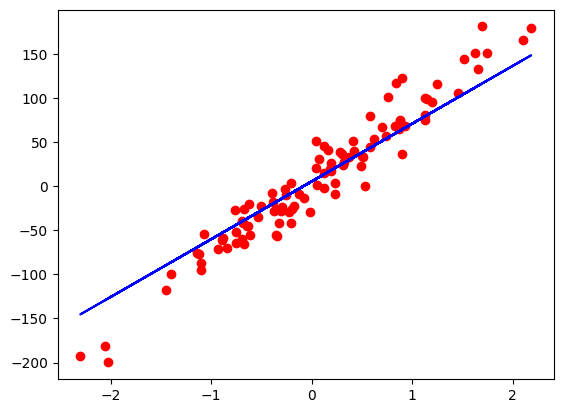

In [37]:
# prepare data
X_numpy, Y_numpy = datasets.make_regression(n_samples = 100, n_features=1, noise=20, random_state=1)

# create torch tensor from numpy
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
# has only one row, create 2D
Y = Y.view(Y.shape[0], 1)

n_samples, n_features = X.shape

# model
input_size = n_features
output_size = 1
model = nn.Linear(n_features, output_size)

# loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
num_epoch = 100
for epoch in range(num_epoch):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, Y)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    # empty gradients
    optimizer.zero_grad()

    if ((epoch+1)%10==0):
        print(f"epoch: {epoch+1}, loss={loss.item():.4f}")

# plot
# dont calc gradient for this operation
pred = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, "ro")
plt.plot(X_numpy, pred, "b")
plt.show()

# Logistic Regression

In [38]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
# prepare data
bc = datasets.load_breast_cancer()
X, Y = bc.data, bc.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)

# features will have 0 mean
# and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# create torch tensor from numpy
X_train = torch.from_numpy(X_train.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_test = torch.from_numpy(Y_test.astype(np.float32))

# has only one row, create 2D
Y_train = Y_train.view(Y_train.shape[0], 1)
Y_test = Y_test.view(Y_test.shape[0], 1)

class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()

        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

n_samples, n_features = X_train.shape

# model
input_size = n_features
model = LogisticRegression(n_features)

# loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
num_epoch = 100
for epoch in range(num_epoch):
    # forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, Y_train)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    # empty gradients
    optimizer.zero_grad()

    if ((epoch+1)%10==0):
        print(f"epoch: {epoch+1}, loss={loss.item():.4f}")

# no need to calc this as a part of gradient operation and add it to computation graph
with torch.no_grad():
    y_pred = model(X_test)
    # round to 0 or 1
    y_pred_cls = y_pred.round()
    
    acc = y_pred_cls.eq(Y_test).sum() / float(Y_test.shape[0])
    print(f"Accuracy = {acc:.4f}")

epoch: 10, loss=0.5419
epoch: 20, loss=0.4543
epoch: 30, loss=0.3972
epoch: 40, loss=0.3568
epoch: 50, loss=0.3265
epoch: 60, loss=0.3028
epoch: 70, loss=0.2836
epoch: 80, loss=0.2676
epoch: 90, loss=0.2541
epoch: 100, loss=0.2424
Accuracy = 0.8947


# Dataset and DatasetLoader

In [40]:
# hard to train on entire dataset at once
# better to divide dataset in small batches
# then training loop will be like

# for epoch in range(1000):
#     for i in range(total_batches):
#         # train on that batch
#         x_batch, y_batch = ...

- **epoch:** 1 forward and backward pass of ALL training samples
- **batch_size:** number of training samples in one forward & backward pass
- **num of iterations:** number of passes, each pass using [batch_size] number of samples

e.g. 100 samples, batch_size=20 --> 100/20 = 5 iterations for 1 epoch

In [41]:
!wget https://raw.githubusercontent.com/patrickloeber/pytorchTutorial/refs/heads/master/data/wine/wine.csv

--2024-12-21 13:43:23--  https://raw.githubusercontent.com/patrickloeber/pytorchTutorial/refs/heads/master/data/wine/wine.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10889 (11K) [text/plain]
Saving to: ‘wine.csv’

wine.csv            100%[===================>]  10.63K  --.-KB/s    in 0s      

2024-12-21 13:43:23 (27.9 MB/s) - ‘wine.csv’ saved [10889/10889]



In [42]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [43]:
class WineDataset(Dataset):
    def __init__(self):
        # data loading
        xy = np.loadtxt("/kaggle/working/wine.csv", delimiter=",", dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]) # create (n_samples, 1) size
        self.n_samples = xy.shape[0];

    def __getitem__(self, index):
        # allow us to use dataset[0]
        return (self.x[index], self.y[index])

    def __len__(self):
        # allow us to use len(dataset)
        return self.n_samples

dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(features, labels)

dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

dataiter = iter(dataloader)
data = next(dataiter)
features, labels = data
print(features, labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])
tensor([[1.1870e+01, 4.3100e+00, 2.3900e+00, 2.1000e+01, 8.2000e+01, 2.8600e+00,
         3.0300e+00, 2.1000e-01, 2.9100e+00, 2.8000e+00, 7.5000e-01, 3.6400e+00,
         3.8000e+02],
        [1.1960e+01, 1.0900e+00, 2.3000e+00, 2.1000e+01, 1.0100e+02, 3.3800e+00,
         2.1400e+00, 1.3000e-01, 1.6500e+00, 3.2100e+00, 9.9000e-01, 3.1300e+00,
         8.8600e+02],
        [1.3770e+01, 1.9000e+00, 2.6800e+00, 1.7100e+01, 1.1500e+02, 3.0000e+00,
         2.7900e+00, 3.9000e-01, 1.6800e+00, 6.3000e+00, 1.1300e+00, 2.9300e+00,
         1.3750e+03],
        [1.2820e+01, 3.3700e+00, 2.3000e+00, 1.9500e+01, 8.8000e+01, 1.4800e+00,
         6.6000e-01, 4.0000e-01, 9.7000e-01, 1.0260e+01, 7.2000e-01, 1.7500e+00,
         6.8500e+02]]) tensor([[2.],
        [2.],
        [1.],
        [3.]])


In [44]:
class WineDataset(Dataset):
    def __init__(self):
        # data loading
        xy = np.loadtxt("/kaggle/working/wine.csv", delimiter=",", dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]) # create (n_samples, 1) size
        self.n_samples = xy.shape[0];

    def __getitem__(self, index):
        # allow us to use dataset[0]
        return (self.x[index], self.y[index])

    def __len__(self):
        # allow us to use len(dataset)
        return self.n_samples

dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(features, labels)

batch_size = 4
dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=2)

dataiter = iter(dataloader)
data = next(dataiter)
features, labels = data
print(features, labels)

# dummy training loop
num_epoch = 2
total_samples = len(dataset)
n_iter = math.ceil(total_samples / batch_size)

for epoch in range(num_epoch):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward backward update

        if (i+1)%5==0:
            print(f"epoch: {epoch+1}/{num_epoch}, step: {i+1}/{n_iter}")

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])
tensor([[1.2530e+01, 5.5100e+00, 2.6400e+00, 2.5000e+01, 9.6000e+01, 1.7900e+00,
         6.0000e-01, 6.3000e-01, 1.1000e+00, 5.0000e+00, 8.2000e-01, 1.6900e+00,
         5.1500e+02],
        [1.3390e+01, 1.7700e+00, 2.6200e+00, 1.6100e+01, 9.3000e+01, 2.8500e+00,
         2.9400e+00, 3.4000e-01, 1.4500e+00, 4.8000e+00, 9.2000e-01, 3.2200e+00,
         1.1950e+03],
        [1.2160e+01, 1.6100e+00, 2.3100e+00, 2.2800e+01, 9.0000e+01, 1.7800e+00,
         1.6900e+00, 4.3000e-01, 1.5600e+00, 2.4500e+00, 1.3300e+00, 2.2600e+00,
         4.9500e+02],
        [1.2820e+01, 3.3700e+00, 2.3000e+00, 1.9500e+01, 8.8000e+01, 1.4800e+00,
         6.6000e-01, 4.0000e-01, 9.7000e-01, 1.0260e+01, 7.2000e-01, 1.7500e+00,
         6.8500e+02]]) tensor([[3.],
        [1.],
        [2.],
        [3.]])
epoch: 1/2, 

In [45]:
# build in dataset
# MNIST dataset
# torchvision.datasets.MNIST()
# fashion-mnist, cifar, coco 

# Dataset Transforms

In [46]:
!wget https://raw.githubusercontent.com/patrickloeber/pytorchTutorial/refs/heads/master/data/wine/wine.csv

--2024-12-21 13:43:24--  https://raw.githubusercontent.com/patrickloeber/pytorchTutorial/refs/heads/master/data/wine/wine.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10889 (11K) [text/plain]
Saving to: ‘wine.csv.1’

wine.csv.1          100%[===================>]  10.63K  --.-KB/s    in 0.001s  

2024-12-21 13:43:24 (13.4 MB/s) - ‘wine.csv.1’ saved [10889/10889]



In [47]:
import torch
import torchvision
from torch.utils.data import Dataset
import numpy as np

In [48]:
dataset = torchvision.datasets.MNIST(root="./data", transform=torchvision.transforms.ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15889709.62it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 477564.60it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4484327.56it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5363324.54it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Has multiple already defined transforms

**On Images**
- CenterCrop, GrayScale, Pad, RandomAffine, RandomCrop
- RandomHorizontalFlip, RandomRotation, Resize, Scale

**On Tensors**
- LinearTransformation, Normalize, RandomErasing

**Conversion**
- ToPILImage
- ToTensor

**Generic**
- write lambdas

**Custom**
- create custom class

**Compose Multiple Transform**
```
composed = transforms.Compose([Rescale(256), RandomCrop(224)])
```

In [49]:
class WineDataset(Dataset):
    def __init__(self, transform=None):
        # data loading
        xy = np.loadtxt("/kaggle/working/wine.csv", delimiter=",", dtype=np.float32, skiprows=1)

        # note we didnt convert numpy arr to tensor
        self.x = xy[:, 1:]
        self.y = xy[:, [0]]
        
        self.n_samples = xy.shape[0];

        self.transform = transform

    def __getitem__(self, index):
        # allow us to use dataset[0]
        sample = (self.x[index], self.y[index])

        # transform if transformation is there for dataset
        if (self.transform):
            sample = self.transform(sample)

        return sample
    
    def __len__(self):
        # allow us to use len(dataset)
        return self.n_samples

class ToTensor():
    def __call__(self, sample):
        inputs, targets = sample
        return (torch.from_numpy(inputs), torch.from_numpy(targets))

class MulTransform():
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        input, target = sample
        input *= self.factor
        return (input, target)

dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(features, labels)
print(type(features), type(labels))

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(features, labels)
print(type(features), type(labels))

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03]) tensor([1.])
<class 'torch.Tensor'> <class 'torch.Tensor'>


# Softmax and CrossEntropy

In [50]:
import torch
import torch.nn as nn
import numpy as np

In [51]:
x = np.array([2.0, 1.0, 0.1])

# from scratch
def softmax(x):
    # converts continuous to probability values
    return np.exp(x) / np.sum(np.exp(x), axis=0)

outputs = softmax(x)
print(f"Softmax numpy: {outputs}")

# using torch
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)

Softmax numpy: [0.65900114 0.24243297 0.09856589]


In [52]:
Y = np.array([1, 0, 0])

Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])

# from scratch
def crossEntropy(actual, predicted):
    # use as err for classification related task
    loss = -np.sum(actual*np.log(predicted))
    return loss # / float(predicted.shape[0])

l1 = crossEntropy(Y, Y_pred_good)
l2 = crossEntropy(Y, Y_pred_bad)
print(f"Loss1 numpy: {l1:.4f}")
print(f"Loss2 numpy: {l2:.4f}")

# using torch
# CrossEntropyLoss already applies nn.LogSoftmax + nn.NLLLoss (negative log likelyhood loss)
# So, no softmax in last layer
# Y has class labels not one hot encoded
# Y_pred has raw scores (logits), no softmax
# 3 samples
Y = torch.tensor([2, 0, 1])
# nsamples x nclasses = 3x3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3], [0.5, 2.0, 0.3], [0.5, 2.0, 0.3]])

loss = nn.CrossEntropyLoss();
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f"Loss1 numpy: {l1:.4f}")
print(f"Loss2 numpy: {l2:.4f}")

# print actual class
_, pred1 = torch.max(Y_pred_good, 1)
_, pred2 = torch.max(Y_pred_bad, 1)
print(pred1)
print(pred2)

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026
Loss1 numpy: 0.4582
Loss2 numpy: 1.4073
tensor([2, 0, 1])
tensor([1, 1, 1])


In [53]:
# multiclass classification
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at end since using cross-entropy loss
        return out

model = NeuralNet(input_size = 28*28, hidden_size=5, output_size=3)
loss = nn.CrossEntropyLoss()

In [54]:
# binary classification
# 1 output
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = torch.sigmoid(out)
        # no softmax at end since using cross-entropy loss
        return out

model = NeuralNet2(input_size = 28*28, hidden_size=5)
loss = nn.BCELoss()

# Activation Functions

- **sigmoid:** last layer of binary classification
- **tanh:** hidden layers, same as convert continius data to prob for binaries
- **relu:** relu for hidden layers
- **leaky relu:**: better version of relu, tries to solve vanishing gradient problem

# Feed Forward Neural Network

In [55]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [56]:
# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [57]:
# hyper param
input_size = 28*28
hidden_size = 500
num_classes = 10

# training 
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [58]:
# import data
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)

# import data
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transforms.ToTensor())

In [59]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

torch.Size([100, 1, 28, 28]) torch.Size([100])


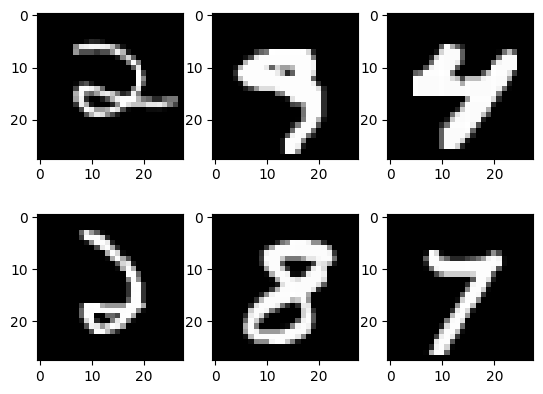

In [60]:
examples = iter(train_loader)
samples, labels = next(examples)

print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap="gray")
plt.show()

In [61]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

# send neural net to device
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

loss = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # reshape to flatten image
        # currenly (100, 1, 28, 28)
        # where 100 is num of samples in a batch, 1 is num of channels, 28 is image size
        # flatten would be (100, 784)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        l = loss(outputs, labels)
        
        # backward
        optimizer.zero_grad()
        l.backward()
        optimizer.step()

        if ((i+1)%100==0):
            print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss={l.item():.4f}")

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f"accuracy={acc}")

epoch 1/2, step 100/600, loss=0.5071
epoch 1/2, step 200/600, loss=0.1780
epoch 1/2, step 300/600, loss=0.2048
epoch 1/2, step 400/600, loss=0.1469
epoch 1/2, step 500/600, loss=0.0551
epoch 1/2, step 600/600, loss=0.1080
epoch 2/2, step 100/600, loss=0.1459
epoch 2/2, step 200/600, loss=0.1757
epoch 2/2, step 300/600, loss=0.1249
epoch 2/2, step 400/600, loss=0.1110
epoch 2/2, step 500/600, loss=0.2699
epoch 2/2, step 600/600, loss=0.0518
accuracy=96.68


# Convulation Neural Network

- allow sharing of weights, across image space in location
- so that we can find if something is present anywhere in image
- pooling to extract high level features, like curves and all

In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [63]:
# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [64]:
# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

In [65]:
# dataset has PILImage of range [0, 1]
# we transform them to tensor of normalized range [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [66]:
train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True,
                                            download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False,
                                            download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

100%|██████████| 170498071/170498071 [00:04<00:00, 34915652.23it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [67]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # 3 color channels, output channel size, kernel size
        self.conv1 = nn.Conv2d(3, 6, 5)
        # kernel size 2, stride
        self.pool = nn.MaxPool2d(2, 2)
        # input channels equal to last channel size, output channel size, kernel size
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 16 channels and 2d square matrix of size 5
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if ((i+1)%100==0):
            print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss={loss.item():.4f}")

print('Finished Training')
# save trained model
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

epoch 1/5, step 100/12500, loss=2.3263
epoch 1/5, step 200/12500, loss=2.3281
epoch 1/5, step 300/12500, loss=2.3214
epoch 1/5, step 400/12500, loss=2.3304
epoch 1/5, step 500/12500, loss=2.3138
epoch 1/5, step 600/12500, loss=2.3256
epoch 1/5, step 700/12500, loss=2.3223
epoch 1/5, step 800/12500, loss=2.2921
epoch 1/5, step 900/12500, loss=2.2978
epoch 1/5, step 1000/12500, loss=2.3216
epoch 1/5, step 1100/12500, loss=2.2894
epoch 1/5, step 1200/12500, loss=2.2915
epoch 1/5, step 1300/12500, loss=2.3102
epoch 1/5, step 1400/12500, loss=2.3376
epoch 1/5, step 1500/12500, loss=2.2964
epoch 1/5, step 1600/12500, loss=2.3100
epoch 1/5, step 1700/12500, loss=2.3220
epoch 1/5, step 1800/12500, loss=2.3236
epoch 1/5, step 1900/12500, loss=2.3023
epoch 1/5, step 2000/12500, loss=2.3277
epoch 1/5, step 2100/12500, loss=2.3042
epoch 1/5, step 2200/12500, loss=2.3328
epoch 1/5, step 2300/12500, loss=2.2820
epoch 1/5, step 2400/12500, loss=2.3494
epoch 1/5, step 2500/12500, loss=2.2899
epoch 1/5

# Transfer Learning

In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [69]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2024-12-21 13:46:55--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 18.238.238.23, 18.238.238.114, 18.238.238.82, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.238.238.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M   243MB/s    in 0.2s    

2024-12-21 13:46:55 (243 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [70]:
!unzip /kaggle/working/hymenoptera_data.zip

Archive:  /kaggle/working/hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/t

In [71]:
# should have following file format
# data
# |-> train
# |     |->ants
# |     |->bees
# |->val
#     |->ants
#     |->bees

In [72]:
# cuda:0 selects which GPU to use
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [73]:
data_dir = "/kaggle/working/hymenoptera_data"
sets = ["train", "val"]

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                 for x in sets}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

In [74]:
class_names = image_datasets["train"].classes
print(class_names)

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

['ants', 'bees']


In [75]:
# get pretrained model
model = models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 206MB/s]


In [76]:
# change last fully connected layer
# get num of features in last fully connected layer
num_input_ftrs_last_layer = model.fc.in_features

# replace last layer to classify only 2 classes
model.fc = nn.Linear(num_input_ftrs_last_layer, 2)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# scheduler
# to change learning rate
# every 7 epoch, learning rate is multiplied bu gamma
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=20)

Epoch 0/19
----------
train Loss: 0.6223 Acc: 0.6721
val Loss: 0.4993 Acc: 0.7451

Epoch 1/19
----------
train Loss: 0.4681 Acc: 0.8197
val Loss: 0.4028 Acc: 0.8562

Epoch 2/19
----------
train Loss: 0.4675 Acc: 0.7869
val Loss: 0.3469 Acc: 0.8824

Epoch 3/19
----------
train Loss: 0.4014 Acc: 0.8320
val Loss: 0.2542 Acc: 0.9346

Epoch 4/19
----------
train Loss: 0.3846 Acc: 0.8320
val Loss: 0.2422 Acc: 0.9150

Epoch 5/19
----------
train Loss: 0.4019 Acc: 0.8033
val Loss: 0.2197 Acc: 0.9346

Epoch 6/19
----------
train Loss: 0.3770 Acc: 0.8607
val Loss: 0.2185 Acc: 0.9346

Epoch 7/19
----------
train Loss: 0.3685 Acc: 0.8484
val Loss: 0.2350 Acc: 0.9216

Epoch 8/19
----------
train Loss: 0.3687 Acc: 0.8033
val Loss: 0.2263 Acc: 0.9281

Epoch 9/19
----------
train Loss: 0.3599 Acc: 0.8402
val Loss: 0.2435 Acc: 0.9216

Epoch 10/19
----------
train Loss: 0.4022 Acc: 0.8197
val Loss: 0.2368 Acc: 0.9150

Epoch 11/19
----------
train Loss: 0.3539 Acc: 0.8484
val Loss: 0.2079 Acc: 0.9412

Ep

In [77]:
# freeze some layer training, expect last layer
# change last fully connected layer
# get num of features in last fully connected layer
num_input_ftrs_last_layer = model.fc.in_features
for param in model.parameters():
    param.requires_grad = False

# replace last layer to classify only 2 classes
model.fc = nn.Linear(num_input_ftrs_last_layer, 2)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# scheduler
# to change learning rate
# every 7 epoch, learning rate is multiplied bu gamma
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=20)

Epoch 0/19
----------
train Loss: 0.6753 Acc: 0.5779
val Loss: 0.5268 Acc: 0.7516

Epoch 1/19
----------
train Loss: 0.5218 Acc: 0.7459
val Loss: 0.4078 Acc: 0.8562

Epoch 2/19
----------
train Loss: 0.4599 Acc: 0.7992
val Loss: 0.3218 Acc: 0.9216

Epoch 3/19
----------
train Loss: 0.4838 Acc: 0.7910
val Loss: 0.2846 Acc: 0.9216

Epoch 4/19
----------
train Loss: 0.3950 Acc: 0.8238
val Loss: 0.2545 Acc: 0.9150

Epoch 5/19
----------
train Loss: 0.4002 Acc: 0.8238
val Loss: 0.2439 Acc: 0.9281

Epoch 6/19
----------
train Loss: 0.4071 Acc: 0.8115
val Loss: 0.2296 Acc: 0.9412

Epoch 7/19
----------
train Loss: 0.4393 Acc: 0.7623
val Loss: 0.2313 Acc: 0.9216

Epoch 8/19
----------
train Loss: 0.3415 Acc: 0.8525
val Loss: 0.2245 Acc: 0.9346

Epoch 9/19
----------
train Loss: 0.3709 Acc: 0.8607
val Loss: 0.2373 Acc: 0.9281

Epoch 10/19
----------
train Loss: 0.3620 Acc: 0.8402
val Loss: 0.2273 Acc: 0.9216

Epoch 11/19
----------
train Loss: 0.3822 Acc: 0.8238
val Loss: 0.2157 Acc: 0.9412

Ep

# Save and Load Model

In [78]:
import torch
import torch.nn as nn

```
PATH=""
model=""

# can save model or anything
# uses pickle to save
# saves complete model
# disadv: serialized is bound to specific classes
# and exact dir struct used when model is saved
torch.save(arg, PATH)

# model class must be defined somewhere
model = torch.load(PATH)
model.eval()

# better way/recommended
# use only for interference later
torch.save(model.state_dict(), PATH)

model = Model()
model.load_state_dict(torch.load(PATH))
# set model to evaluation mode
# this disables dropout layers, aleters batch noralization
model.eval()
```

In [79]:
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_input_features=6)

In [80]:
FILE = "model.pth"
torch.save(model, FILE)

In [81]:
model = torch.load(FILE)
model.eval()

<ipython-input-81-f7f0e38a2650>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(FILE)


Model(
  (linear): Linear(in_features=6, out_features=1, bias=True)
)

In [82]:
FILE = "model.pth"
torch.save(model.state_dict(), FILE)

In [83]:
loaded_model = Model(n_input_features=6)
loaded_model.load_state_dict(torch.load(FILE))
loaded_model.eval()

<ipython-input-83-5dfbf6dbd61e>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(FILE))


Model(
  (linear): Linear(in_features=6, out_features=1, bias=True)
)

In [84]:
# can also save any state dict, like optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print(optimizer.state_dict())

{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1]}]}


In [85]:
checkpoint = {
    "epoch": 90,
    "model_states": model.state_dict(),
    "optim_state": optimizer.state_dict()
}

torch.save(checkpoint, "checkpoint.pth")

loaded_checkpoint = torch.load("checkpoint.pth")
epoch = loaded_checkpoint["epoch"]

model = Model(n_input_features=6)
optimizer = torch.optim.SGD(model.parameters(), lr=0)

model.load_state_dict(loaded_checkpoint["model_states"])
optimizer.load_state_dict(loaded_checkpoint["optim_state"])

<ipython-input-85-2aa5d5d6a022>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_checkpoint = torch.load("checkpoint.pth")


In [86]:
# if using CPU for training and loading in CPU then no change
# if using GPU for training and later uload it in cpu
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

device = torch.device("cpu")
model = Model(n_input_features=6)
model.load_state_dict(torch.load(PATH, map_location=device))

# if using GPU for trainign and load it in GPUdevice = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

model = Model(n_input_features=6)
model.load_state_dict(torch.load(PATH))
model.to(device)

<ipython-input-86-a84a95d4fc0b>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(PATH, map_location=device))
<ipython-input-86-a84a95d4fc0b>

Model(
  (linear): Linear(in_features=6, out_features=1, bias=True)
)

# Use model in API

In [87]:
import io
import torch 
import torch.nn as nn 
import torchvision.transforms as transforms 
from PIL import Image

In [88]:
# load model

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
model = NeuralNet(input_size, hidden_size, num_classes)

PATH = "mnist_ffn.pth"
torch.save(model.state_dict(), PATH)
model.load_state_dict(torch.load(PATH))
model.eval()

<ipython-input-88-03381f49a2ad>:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(PATH))


NeuralNet(
  (l1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=500, out_features=10, bias=True)
)

In [89]:
# image -> tensor
def transform_image(image_bytes):
    # transform image to match input image
    transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                    transforms.Resize((28,28)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,),(0.3081,))])
    # get image from bytes object
    image = Image.open(io.BytesIO(image_bytes))
    # append one extra dimension for batch 
    return transform(image).unsqueeze(0)

# predict
def get_prediction(image_tensor):
    # reshape to flatten image
    images = image_tensor.reshape(-1, 28*28)
    outputs = model(images)
        # max returns (value ,index)
    _, predicted = torch.max(outputs.data, 1)
    return predicted

# RNN
- allow prev output to be used as input while having hidden states
- so prev input influence current ouptut
- weights shared across time
- slow computation
- difficult to access info from long time
- can process input of any length

In [90]:
!wget https://download.pytorch.org/tutorial/data.zip

--2024-12-21 13:48:44--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 99.86.38.37, 99.86.38.72, 99.86.38.106, ...
Connecting to download.pytorch.org (download.pytorch.org)|99.86.38.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  --.-KB/s    in 0.05s   

2024-12-21 13:48:45 (56.8 MB/s) - ‘data.zip’ saved [2882130/2882130]



In [91]:
!unzip /kaggle/working/data.zip

Archive:  /kaggle/working/data.zip
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  


In [92]:
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt 

In [93]:
import io
import os
import unicodedata
import string
import glob
import random

In [94]:
# alphabet small + capital letters + " .,;'"
ALL_LETTERS = string.ascii_letters + " .,;'"
N_LETTERS = len(ALL_LETTERS)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in ALL_LETTERS
    )

def load_data():
    # Build the category_lines dictionary, a list of names per language
    category_lines = {}
    all_categories = []
    
    def find_files(path):
        return glob.glob(path)
    
    # Read a file and split into lines
    def read_lines(filename):
        lines = io.open(filename, encoding='utf-8').read().strip().split('\n')
        return [unicode_to_ascii(line) for line in lines]
    
    for filename in find_files("/kaggle/working/data/*.txt"):
        category = os.path.splitext(os.path.basename(filename))[0]
        all_categories.append(category)
        
        lines = read_lines(filename)
        category_lines[category] = lines
        
    return category_lines, all_categories

In [95]:
"""
To represent a single letter, we use a “one-hot vector” of 
size <1 x n_letters>. A one-hot vector is filled with 0s
except for a 1 at index of the current letter, e.g. "b" = <0 1 0 0 0 ...>.

To make a word we join a bunch of those into a
2D matrix <line_length x 1 x n_letters>.

That extra 1 dimension is because PyTorch assumes
everything is in batches - we’re just using a batch size of 1 here.

Also note we have 1 in between two dimension cause at one iteration we are passing (1xn_letters)

"""

# Find letter index from all_letters, e.g. "a" = 0
def letter_to_index(letter):
    return ALL_LETTERS.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letter_to_tensor(letter):
    tensor = torch.zeros(1, N_LETTERS)
    tensor[0][letter_to_index(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def line_to_tensor(line):
    tensor = torch.zeros(len(line), 1, N_LETTERS)
    for i, letter in enumerate(line):
        tensor[i][0][letter_to_index(letter)] = 1
    return tensor

def random_training_example(category_lines, all_categories):
    def random_choice(a):
        random_idx = random.randint(0, len(a) - 1)
        return a[random_idx]
    
    category = random_choice(all_categories)
    line = random_choice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = line_to_tensor(line)
    return category, line, category_tensor, line_tensor

## Model Architecture

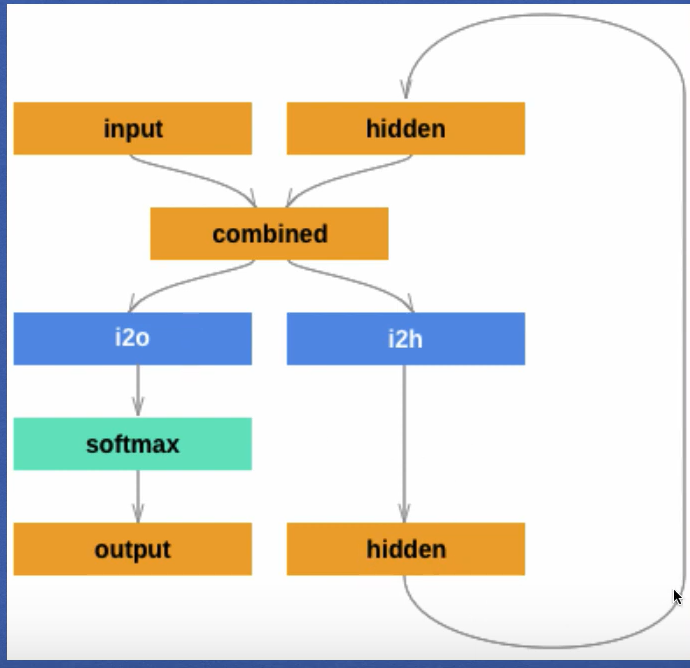

In [96]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1) 

    def forward(self, input_tensor, hidden_tensor):
        combined_tensor = torch.cat((input_tensor, hidden_tensor), 1)

        hidden = self.i2h(combined_tensor)
        output = self.i2o(combined_tensor)
        output = self.softmax(output)

        return output, hidden

    def init_hidden(self):
        # init value of hidden input
        return torch.zeros(1, self.hidden_size)


category_lines, all_categories = load_data()
n_categories = len(all_categories)

n_hidden = 128
rnn = RNN(N_LETTERS, n_hidden, n_categories)

# one step
input_tensor = letter_to_tensor('A')
hidden_tensor = rnn.init_hidden()

output, next_hidden = rnn(input_tensor, hidden_tensor)
print(output.size())
print(next_hidden.size())

def category_from_output(output):
    category_idx = torch.argmax(output).item()
    return all_categories[category_idx]

category_from_output(output)

torch.Size([1, 1])
torch.Size([1, 128])


'eng-fra'

5000 5.0 0.0000 We won.Nous l'emportames. / eng-fra CORRECT
10000 10.0 0.0000 I caught it.Je l'ai attrapee. / eng-fra CORRECT
15000 15.0 0.0000 They are used to the humid climate of the summer.Ils sont accoutumes au climat humide de l'ete. / eng-fra CORRECT
20000 20.0 0.0000 Do you have any more of thoseAvezvous davantage de ceuxla  / eng-fra CORRECT
25000 25.0 0.0000 I often lie about my age.Je mens souvent sur mon age. / eng-fra CORRECT
30000 30.0 0.0000 She enjoyed conversing with him.Elle eut plaisir a converser avec lui. / eng-fra CORRECT
35000 35.0 0.0000 He is used to that type of situation.Il a l'habitude de ce genre de situation. / eng-fra CORRECT
40000 40.0 0.0000 Do you know what day it is todaySaistu quel jour nous sommes  / eng-fra CORRECT
45000 45.0 0.0000 I will miss you.Tu vas me manquer. / eng-fra CORRECT
50000 50.0 0.0000 She reads the newspaper every morning.Elle lit le journal chaque matin. / eng-fra CORRECT
55000 55.00000000000001 0.0000 Did you win the raceAstu ga

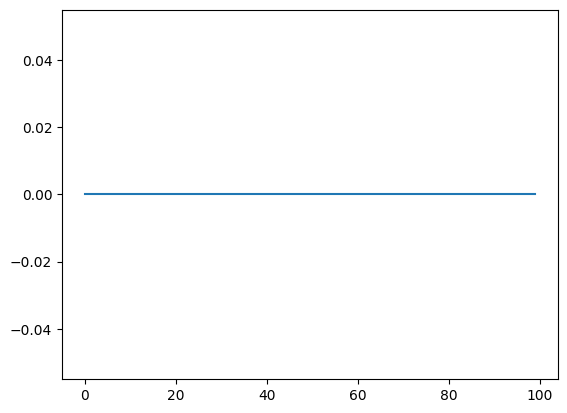

In [97]:
criterion = nn.NLLLoss()

learning_rate = 0.005
optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)

def train(line_tensor, category_tensor):
    hidden = rnn.init_hidden()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        
    loss = criterion(output, category_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return output, loss.item()

current_loss = 0
all_losses = []
plot_steps, print_steps = 1000, 5000
n_iters = 100000
for i in range(n_iters):
    category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)

    output, loss = train(line_tensor, category_tensor)
    current_loss += loss

    if ((i+1)%plot_steps == 0):
        all_losses.append(current_loss / plot_steps)
        current_loss = 0

    if (i+1) % print_steps == 0:
        guess = category_from_output(output)
        correct = "CORRECT" if guess == category else f"WRONG ({category})"
        print(f"{i+1} {(i+1)/n_iters*100} {loss:.4f} {line} / {guess} {correct}")
        
plt.figure()
plt.plot(all_losses)
plt.show()

# RNN, LSTM & GRU

In [98]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [99]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [100]:
# hyper param
input_size = 28 # 1 row at a time
seq_length = 28
hidden_size = 128
num_layers = 2
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [101]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root = "./data",
                                           train = True,
                                           transform = transforms.ToTensor(),
                                           download = True)

test_dataset = torchvision.datasets.MNIST(root = "./data",
                                          train = False,
                                          transform = transforms.ToTensor(),
                                          download = True)

In [102]:
# data loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                      batch_size = batch_size,
                                      shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                     batch_size = batch_size,
                                     shuffle = True)

In [103]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        # batch_first means have batch as first dimension
        # input should have this shape: (batch, seq, input_size)
        # takes whole sequence as input instead of one by one
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first = True)
        # do computation based on last hidden
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # set initial hidden states
        # (num_layers, batch_size, hidden_size)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        # out contains output for from rnn for each timestamp
        out, _ = self.rnn(x, h0)
        # out: (batch_size, seq_length, hidden_size)
        # only want last timestamp output
        out = out[:, -1, :]
        out = self.fc(out)
        return out

In [104]:
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(GRU, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        # batch_first means have batch as first dimension
        # input should have this shape: (batch, seq, input_size)
        # takes whole sequence as input instead of one by one
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first = True)
        # do computation based on last hidden
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # set initial hidden states
        # (num_layers, batch_size, hidden_size)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        # out contains output for from rnn for each timestamp
        out, _ = self.gru(x, h0)
        # out: (batch_size, seq_length, hidden_size)
        # only want last timestamp output
        out = out[:, -1, :]
        out = self.fc(out)
        return out

In [105]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        # batch_first means have batch as first dimension
        # input should have this shape: (batch, seq, input_size)
        # takes whole sequence as input instead of one by one
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first = True)
        # do computation based on last hidden
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # set initial hidden states
        # (num_layers, batch_size, hidden_size)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        # init cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        # out contains output for from rnn for each timestamp
        out, _ = self.lstm(x, (h0, c0))
        # out: (batch_size, seq_length, hidden_size)
        # only want last timestamp output
        out = out[:, -1, :]
        out = self.fc(out)
        return out

In [106]:
model = LSTM(input_size, hidden_size, num_layers, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [107]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [batch, 1, 28, 28]
        # resized = [batch_size, seq_size, input_size]
        images = images.reshape(-1, seq_length, input_size).to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if ((i+1) % 100 == 0):
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# test model
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, seq_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
    acc = 100 * n_correct / n_samples
    print(f"Accuracy of the network: {acc}%")

Epoch [1/2], Step [100/600], Loss: 0.7202
Epoch [1/2], Step [200/600], Loss: 0.3093
Epoch [1/2], Step [300/600], Loss: 0.3096
Epoch [1/2], Step [400/600], Loss: 0.2807
Epoch [1/2], Step [500/600], Loss: 0.1853
Epoch [1/2], Step [600/600], Loss: 0.1363
Epoch [2/2], Step [100/600], Loss: 0.1039
Epoch [2/2], Step [200/600], Loss: 0.1735
Epoch [2/2], Step [300/600], Loss: 0.0816
Epoch [2/2], Step [400/600], Loss: 0.4524
Epoch [2/2], Step [500/600], Loss: 0.0325
Epoch [2/2], Step [600/600], Loss: 0.1792
Accuracy of the network: 96.96%


# Pytorch Lighting

In [108]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import torch.nn.functional as F
from pytorch_lightning import Trainer

In [109]:
# Hyper-parameters
input_size = 784  # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [110]:
class LitNeuralNet(pl.LightningModule):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LitNeuralNet, self).__init__()
        # save hyperparam passed to init
        self.save_hyperparameters()
        
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

    def training_step(self, batch, batch_idx):
        images, labels = batch
        # flatten image
        images = images.reshape(-1, 28*28)

        # forward pass
        outputs = self(images)
        loss = F.cross_entropy(outputs, labels)
        
        # will be shown when training in console
        return loss

    def test_step(self, batch, batch_idx):
        # called when u do trainer.test()
        images, labels = batch
        # flatten image
        images = images.reshape(-1, 28*28)

        # forward pass
        outputs = self(images)
        test_loss = F.cross_entropy(outputs, labels)
        
        # shows metric in progress bar
        # self.log("test_loss", test_loss, prog_bar=True))
        # self.log_dict(values) to log dict
        # shows in tensorboard
        self.log("test_loss", test_loss)

    def validation_step(self, batch, batch_idx):
        # on on seen data
        images, labels = batch
        # flatten image
        images = images.reshape(-1, 28*28)

        # forward pass
        outputs = self(images)

        val_loss = F.cross_entropy(outputs, labels)
        self.log("val_loss", val_loss)
        
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=learning_rate)

In [111]:
#Mnist dataset
train_dataset = torchvision.datasets.MNIST(
    root="./data", train=True,
    transform=transforms.ToTensor(), download=True   
)
# data loader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size,
    num_workers=4, shuffle=False
)

In [112]:
test_dataset = torchvision.datasets.MNIST(
    root="./data", train=False,
    transform=transforms.ToTensor(),
    download=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size,
    num_workers=4, shuffle=False
)

In [113]:
if __name__ == "__main__":
    # for devs testing if model works fine
    # set (fast_dev_run=True)
    # run single batch through training and validation
    # automatic checkpointing using Trainers 
    # automaitcally trains on as many GPUs are available
    trainer = Trainer(max_epochs=num_epochs, fast_dev_run=False)
    model = LitNeuralNet(input_size, hidden_size, num_classes)

    trainer.fit(model, train_loader, test_loader)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [114]:
trainer.test(model, dataloaders=test_loader)

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.12206258624792099    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.12206258624792099}]

In [115]:
%load_ext tensorboard

In [116]:
%tensorboard --logdir=/kaggle/working/lightning_logs

<IPython.core.display.Javascript object>

## Load Lightning Module

In [117]:
!ls /kaggle/working/lightning_logs/version_0/checkpoints

'epoch=1-step=1200.ckpt'


/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [118]:
model = LitNeuralNet.load_from_checkpoint("/kaggle/working/lightning_logs/version_0/checkpoints/epoch=1-step=1200.ckpt")

# disable randomness, dropout, etc...
model.eval()

# we can access model hyperparams
print(model.input_size)

784


In [119]:
# load from checkpoint but init model with different hyper params
# if not saved with hyperparams, or set ignore for some positional argument, must pass the argument when initalizing model
model = LitNeuralNet.load_from_checkpoint("/kaggle/working/lightning_logs/version_0/checkpoints/epoch=1-step=1200.ckpt", input_size=784)

In [120]:
# compatible with pytorch load
checkpoint = torch.load("/kaggle/working/lightning_logs/version_0/checkpoints/epoch=1-step=1200.ckpt")
print(checkpoint.keys())

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers', 'hparams_name', 'hyper_parameters'])


<ipython-input-120-b03bf21da4a6>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("/kaggle/working/lightning_logs/version_0/checkpoints/epoch=1-step=

In [121]:
# continue training after loading model
model = LitNeuralNet.load_from_checkpoint("/kaggle/working/lightning_logs/version_0/checkpoints/epoch=1-step=1200.ckpt", input_size=784)
trainer = Trainer(max_epochs=num_epochs, fast_dev_run=False)
trainer.fit(model, ckpt_path="/kaggle/working/lightning_logs/version_0/checkpoints/epoch=1-step=1200.ckpt", train_dataloaders=train_loader)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:362: The dirpath has changed from '/kaggle/working/lightning_logs/version_0/checkpoints' to '/kaggle/working/lightning_logs/version_1/checkpoints', therefore `best_model_score`, `kth_best_model_path`, `kth_value`, `last_model_path` and `best_k_models` won't be reloaded. Only `best_model_path` will be reloaded.
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


## Transfer Learning 

In [122]:
import torchvision.models as models

In [123]:
backbone = models.resnet50(weights="DEFAULT")
print(backbone)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 223MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [124]:
print(backbone.fc.in_features)

2048


In [125]:
# gives all layers
print(list(backbone.children()))

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False), BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), ReLU(inplace=True), MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False), Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=Tr

In [126]:
class ImagenetTransferLearning(pl.LightningModule):
    def __init__(self):
        super(ImagenetTransferLearning, self).__init__()

        # init a pretrained resnet
        backbone = models.resnet50(weights="DEFAULT")
        num_filters = backbone.fc.in_features
        # get all layers except last one
        layers = list(backbone.children())[:-1]
        self.feature_extractor = nn.Sequential(*layers)
        # set to eval mode cause these layers wont be training
        self.feature_extractor.eval()

        # use the pretrained model to classify cifar-10 (10 image classes)
        num_target_classes = 10
        self.classifier = nn.Linear(num_filters, num_target_classes)

    def forward(self, x):
        with torch.no_grad():
            representations = self.feature_extractor(x).flatten(1)
        x = self.classifier(representations)